# Intorduction

Data includes following signals sampled at 125 Hz: 

(1) Electrocardiogram (ECG): ECG signals represent electrical activity of the heart measured in voltage. ECG signals usually include waves like the P wave (atrial depolarization), QRS complex (ventricular depolarization), and T wave (ventricular repolarization).

(2) Photoplethysmograph (PPG): PPG measures changes in blood volume in the microvascular tissue. PPG waveforms typically include an AC (alternating current) component caused by pulsating pressure and a DC (direct current) component related to baseline blood volume. The key features of PPG signals are the pulse rate and oxygen saturation.

(3) Arterial Blood Pressure (ABP): ABP signals represent the pressure on the walls of arteries caused by blood. The signal includes systolic pressure (maximum pressure during heart contraction), diastolic pressure (minimum pressure during heart relaxation), and mean arterial pressure (average pressure throughout the cardiac cycle).


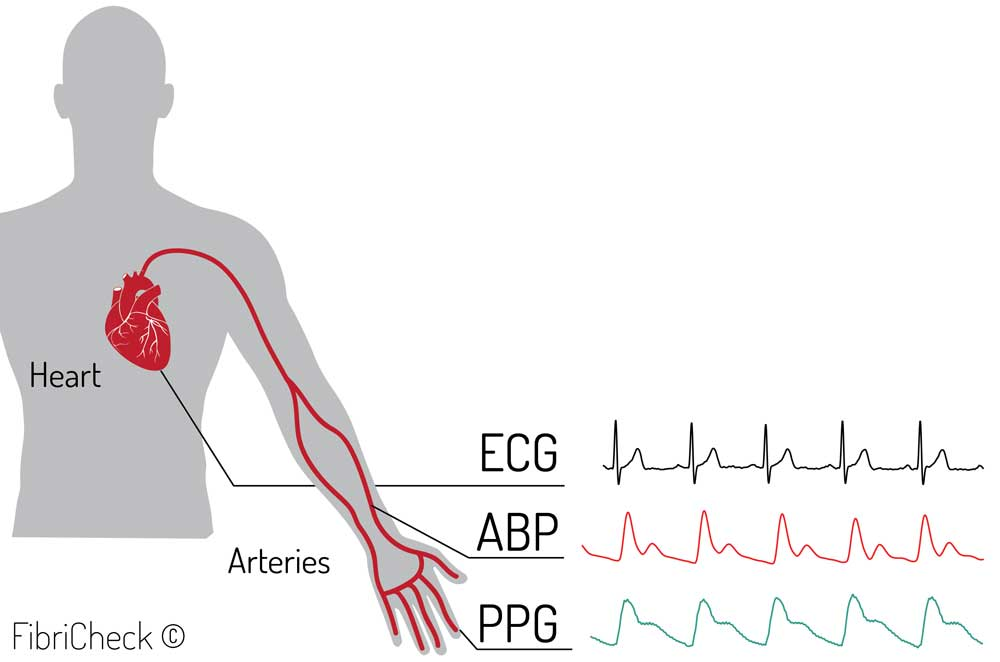

# Importing libraries and data

In [15]:
import os
import numpy as np 
import pandas as pd
import scipy
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

In [16]:
os.listdir('/kaggle/input/BloodPressureDataset')

['part_4.mat',
 'part_9.mat',
 'part_10.mat',
 'Samples',
 'part_11.mat',
 'part_3.mat',
 'part_1.mat',
 'part_8.mat',
 'part_5.mat',
 'part_6.mat',
 'part_7.mat',
 'part_2.mat',
 'part_12.mat']

In [17]:
os.chdir('/kaggle/input/BloodPressureDataset')

# Visulaization of signals

In [18]:
filename = 'part_1.mat'
mat_data = scipy.io.loadmat(filename)['p']

In [19]:
ecg_signal = mat_data[0][0][2]
abp_signal = mat_data[0][0][1]
ppg_signal = mat_data[0][0][0]
fs = 125

(0.0, 1.6)

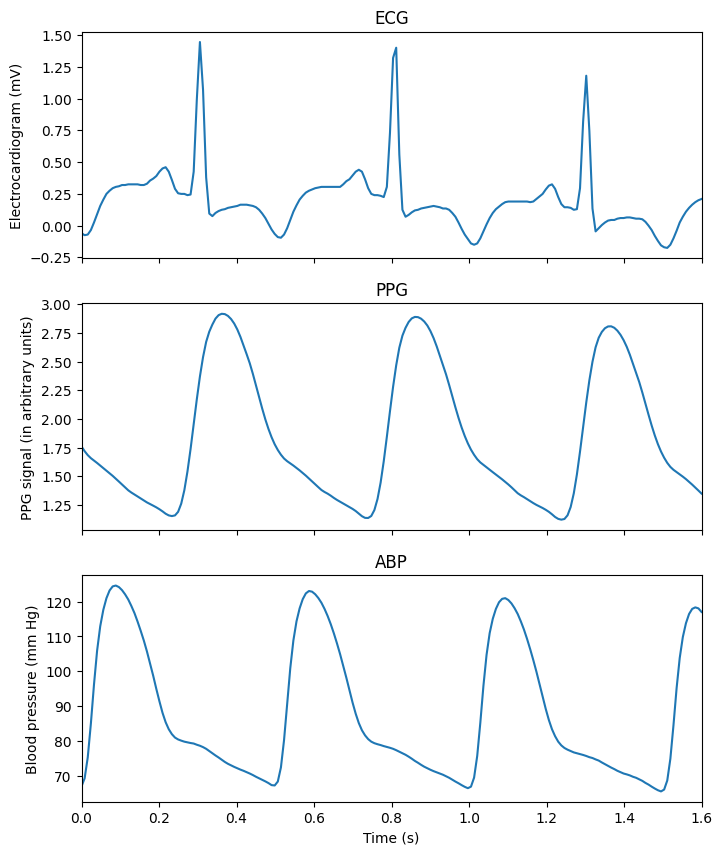

In [20]:
LL = 200
time_array = np.linspace(0, LL/fs, LL)

fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True, figsize=(8, 10))

ax1.set_title('ECG')
ax1.plot(time_array, ecg_signal[:LL])
ax1.set_ylabel('Electrocardiogram (mV)')

ax2.set_title('PPG')
ax2.plot(time_array, ppg_signal[:LL])
ax2.set_ylabel('PPG signal (in arbitrary units)')

ax3.set_title('ABP')
ax3.plot(time_array, abp_signal[:LL])
ax3.set_ylabel('Blood pressure (mm Hg)')
ax3.set_xlabel('Time (s)')
ax3.set_xlim([0, 1.6])

# Cross correlations

In [21]:
cross_correlation = np.correlate(ecg_signal, ppg_signal, mode='full')
max_correlation_coefficient = np.round(np.max(cross_correlation) / (np.linalg.norm(ecg_signal) * np.linalg.norm(ppg_signal)), 2)
max_corr_index = np.argmax(cross_correlation)
time_lag = np.abs(max_corr_index - (len(ppg_signal) - 1))/fs

print(f"The maximum cross-correlation coefficient between the signals is {max_correlation_coefficient}")
print(f"The time lag between ECG and PPG is {time_lag} seconds.")


The maximum cross-correlation coefficient between the signals is 0.73
The time lag between ECG and PPG is 0.144 seconds.


In [22]:
cross_correlation = np.correlate(abp_signal, ppg_signal, mode='full')
max_correlation_coefficient = np.round(np.max(cross_correlation) / (np.linalg.norm(abp_signal) * np.linalg.norm(ppg_signal)), 2)
max_corr_index = np.argmax(cross_correlation)
time_lag = np.abs(max_corr_index - (len(ppg_signal) - 1))/fs

print(f"The maximum cross-correlation coefficient between the signals is {max_correlation_coefficient}")
print(f"The time lag between PPG and ABP is {time_lag} seconds.")

The maximum cross-correlation coefficient between the signals is 0.99
The time lag between PPG and ABP is 0.272 seconds.


The maximum correlation_coefficient provides a normalized measure of similarity of two signals. The metric has a value between -1 and 1, with higher values indicating a stronger correlation between the signals. Here, the values are close to 1 suggesting a high positive correlation between the signals.

# Fast Fourier Transform (FFT)

Text(0.5, 0, 'Frequency (Hz)')

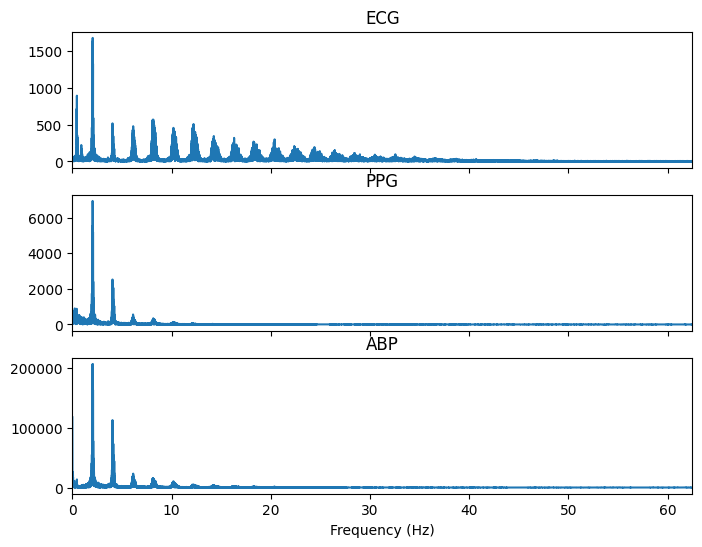

In [23]:

num_samples = len(ecg_sample)
fft_result_ecg = fft(ecg_sample)
fft_result_ppg = fft(ppg_sample)
fft_result_abp = fft(abp_sample)
frequencies = fftfreq(num_samples, 1/fs)

fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True, figsize=(8, 6))
ax1.plot(frequencies[1:num_samples//2], np.abs(fft_result_ecg)[1:num_samples//2])
ax1.set_title('ECG')
ax2.plot(frequencies[1:num_samples//2], np.abs(fft_result_ppg)[1:num_samples//2])
ax2.set_title('PPG')
ax3.plot(frequencies[1:num_samples//2], np.abs(fft_result_abp)[1:num_samples//2])
ax3.set_title('ABP')
plt.xlim([0, fs/2])
plt.xlabel('Frequency (Hz)')

In [24]:
peaks_ecg, _ = find_peaks(np.abs(fft_result_ecg)[1:num_samples//2], distance=num_samples/fs)
peak_index_ecg =  peaks_ecg[np.argsort(np.abs(fft_result_ecg[peaks_ecg]))[::-1][:3]]
peak_frequency_ecg = np.round(frequencies[peak_index_ecg],1)
print('ECG peak freqeuncy')
print(peak_frequency_ecg)

ECG peak freqeuncy
[2.  8.2 0.5]


In [25]:
peaks_ppg, _ = find_peaks(np.abs(fft_result_ppg)[1:num_samples//2], distance=num_samples/fs)
peak_index_ppg = peaks_ppg[np.argsort(np.abs(fft_result_ppg[peaks_ppg]))[::-1][:3]]
peak_frequency_ppg = np.round(frequencies[peak_index_ppg],1)
print('PPG peak freqeuncy')
print(peak_frequency_ppg)

PPG peak freqeuncy
[2.  4.  0.2]


In [26]:
peaks_abp, _ = find_peaks(np.abs(fft_result_abp)[1:num_samples//2], distance=num_samples/fs)
peak_index_abp = peaks_abp[np.argsort(np.abs(fft_result_abp[peaks_abp]))[::-1][:3]]
peak_frequency_abp = np.round(frequencies[peak_index_abp],1)
print('ABP peak freqeuncy')
print(peak_frequency_abp)

ABP peak freqeuncy
[2. 4. 0.]
